# CMA-ES - Radosław Kawa

In [4]:
import numpy as np
import cma
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
from typing import Callable

### Optimization Problems

This cell defines three common benchmark functions, Sphere, Rosenbrock, and Rastrigin, used to test optimization algorithms. We also used these functions earlier to evaluate Adam and Momentum.

In [5]:
def sphere(x: np.ndarray) -> float:
    return float(np.sum(x**2))


def rosenbrock(x: np.ndarray) -> float:
    return float(np.sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1.0 - x[:-1]) ** 2.0))


def rastrigin(x: np.ndarray) -> float:
    A: float = 10.0
    return float(A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x)))

### Helper functions

Convergence plot and animation.

In [6]:
def plot_convergence(histories: dict[str, list[float]]) -> None:
    plt.figure()
    for name, fitness in histories.items():
        plt.plot(fitness, label=name)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("CMA-ES Convergence")
    plt.legend()
    plt.grid(True)
    plt.show()

def animate_distribution(
    func: Callable[[np.ndarray], float],
    mu_history: list[np.ndarray],
    cov_history: list[np.ndarray],
    bounds: tuple[float, float] = (-5, 5),
    frames: int = 50,
    filename: str = "cma_es_animation.mp4",
) -> None:
    x = np.linspace(bounds[0], bounds[1], 200)
    y = np.linspace(bounds[0], bounds[1], 200)
    X, Y = np.meshgrid(x, y)
    coords = np.vstack([X.ravel(), Y.ravel()]).T
    Z = np.array([func(pt) for pt in coords]).reshape(X.shape)

    fig, ax = plt.subplots()
    levels = np.logspace(np.log10(Z.min() + 1e-6), np.log10(Z.max()), 30)

    def update(frame_index: int) -> None:
        ax.clear()
        ax.contour(X, Y, Z, levels=levels, cmap="viridis")
        mu = mu_history[frame_index]
        cov = cov_history[frame_index]
        vals, vecs = np.linalg.eigh(cov)
        angle = float(np.degrees(np.arctan2(vecs[0, 1], vecs[0, 0])))
        width, height = 2 * np.sqrt(vals)
        ellipse = Ellipse(
            xy=mu,
            width=width,
            height=height,
            angle=angle,
            edgecolor="red",
            facecolor="none",
            lw=2,
        )
        ax.add_patch(ellipse)
        ax.plot(mu[0], mu[1], "ro")
        ax.set_title(f"Generation {frame_index}")
        ax.set_xlim(bounds)
        ax.set_ylim(bounds)

    anim = FuncAnimation(fig, update, frames=min(frames, len(mu_history)), interval=200)
    anim.save(filename, writer="ffmpeg")
    print(f"Animation saved to {filename}")

### Running CMA-ES

In [13]:
from dataclasses import dataclass

@dataclass
class CMAESResult:
    best_fitness: list[float]
    mean_history: list[np.ndarray]
    cov_history: list[np.ndarray]
    sigma_history: list[float]

def run_cma_es(
    func: Callable[[np.ndarray], float],
    x0: np.ndarray,
    sigma0: float,
    max_iterations: int = 100
) -> CMAESResult:
    # TODO: Implement this function
    # TODO: Use cma.CMAEvolutionStrategy from pycma: https://pypi.org/project/cma/
    # Hint: Use ask and tell methods

    es = cma.CMAEvolutionStrategy(x0, sigma0, {'maxiter': max_iterations})
    best_fitness = []
    mean_history = []
    cov_history = []
    sigma_history = []

    while not es.stop():
        solutions = es.ask()
        fitness = [func(np.array(s)) for s in solutions]
        es.tell(solutions, fitness)
        best_fitness.append(es.result.fbest)
        mean_history.append(es.mean)
        cov_history.append(es.C)
        sigma_history.append(es.sigma)

    return CMAESResult(
        best_fitness=best_fitness,
        mean_history=mean_history,
        cov_history=cov_history,
        sigma_history=sigma_history
    )

### Ex. 1: Impact of the Starting Point
1.	Choose Rosenbrock in 2D.
2.	Run CMA-ES from at least five widely separated initial means (e.g., [-4,-4], [-1,3], [5,5]).
3.	Plot convergence curves and report:
- best fitness vs. generation,
- total evaluations to reach $f(x)\lt10^{-8}$ (or termination).
4.	Briefly discuss sensitivity to the start point. Prepare GIFs for two different starting points.

Hint: use `sigma0 = 0.5` and `max_iter = 250`.

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=478289, Sun May  4 15:03:23 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=520549, Sun May  4 15:03:23 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=452265, Sun May  4 15:03:23 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=453333, Sun May  4 15:03:23 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=523029, Sun May  4 15:03:23 2025)


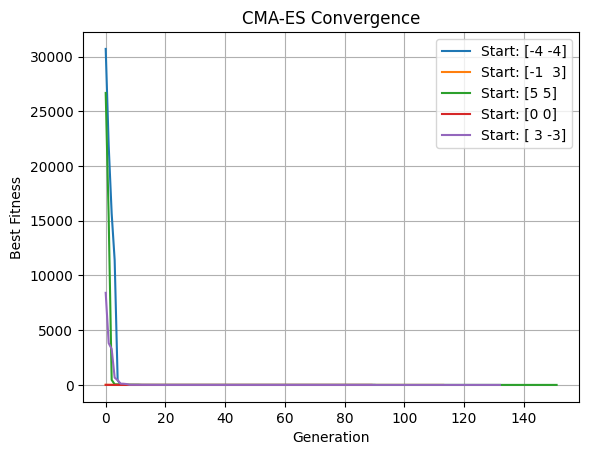

Start: [-4 -4]: Total evaluations = 91
Start: [-1  3]: Total evaluations = 114
Start: [5 5]: Total evaluations = 152
Start: [0 0]: Total evaluations = 90
Start: [ 3 -3]: Total evaluations = 133
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=525867, Sun May  4 15:03:23 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=469623, Sun May  4 15:03:23 2025)


MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved to rosenbrock_start_-4_-4.gif
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=484274, Sun May  4 15:03:26 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=453239, Sun May  4 15:03:26 2025)


MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved to rosenbrock_start_5_5.gif


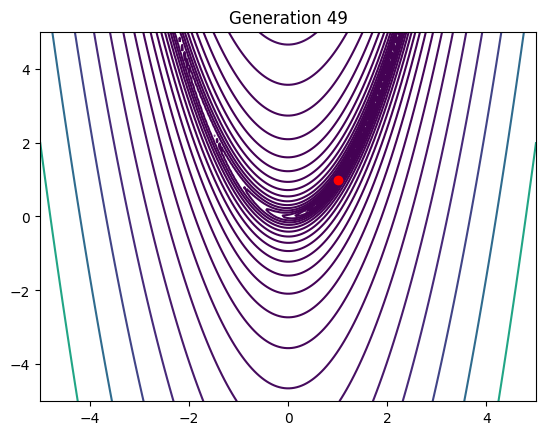

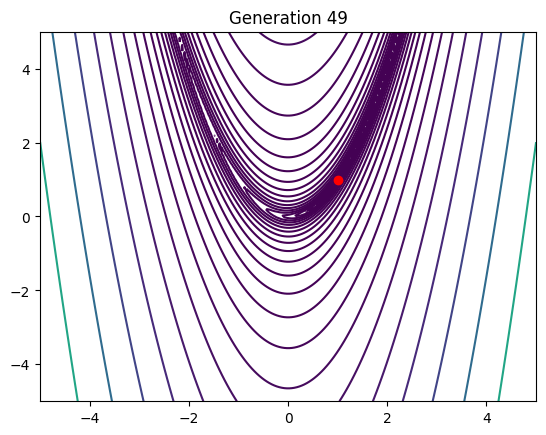

In [15]:
initial_means = [np.array([-4, -4]), np.array([-1, 3]), np.array([5, 5]), np.array([0, 0]), np.array([3, -3])]
sigma0 = 0.5
max_iter = 250

histories = {}
evaluations = {}

for mean in initial_means:
    result = run_cma_es(rosenbrock, mean, sigma0, max_iterations=max_iter)
    histories[f"Start: {mean}"] = result.best_fitness
    evaluations[f"Start: {mean}"] = len(result.best_fitness)

plot_convergence(histories)

for start, evals in evaluations.items():
    print(f"{start}: Total evaluations = {evals}")

animate_distribution(
    func=rosenbrock,
    mu_history=run_cma_es(rosenbrock, np.array([-4, -4]), sigma0, max_iterations=max_iter).mean_history,
    cov_history=run_cma_es(rosenbrock, np.array([-4, -4]), sigma0, max_iterations=max_iter).cov_history,
    bounds=(-5, 5),
    filename="rosenbrock_start_-4_-4.gif"
)

animate_distribution(
    func=rosenbrock,
    mu_history=run_cma_es(rosenbrock, np.array([5, 5]), sigma0, max_iterations=max_iter).mean_history,
    cov_history=run_cma_es(rosenbrock, np.array([5, 5]), sigma0, max_iterations=max_iter).cov_history,
    bounds=(-5, 5),
    filename="rosenbrock_start_5_5.gif"
)

The starting point really makes difference, in example [-1,3] which from almost in the beginning found the global minimum, while [-4,-4] was started from a point that was far away from the global minimum and took more iterations to find it.

### Ex. 2: Effect of the Initial Global Step‐Size $\sigma_0$
1. Use [2,2] at starting point on the Rastrigin function.
2. Test $\sigma_0\in\{0.1,\,0.5,\,1,\,2,\,5\}$.
3. Record and plot
- final fitness after a fixed budget (e.g. 1000 evals)
- evolution of es.sigma over time (log scale).
4. Explain why too-small and too-large $\sigma_0$ hurt performance, relating findings to the adaptation rule.

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=394493, Sun May  4 15:16:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=454276, Sun May  4 15:16:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=406874, Sun May  4 15:16:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=465736, Sun May  4 15:16:48 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=439963, Sun May  4 15:16:48 2025)


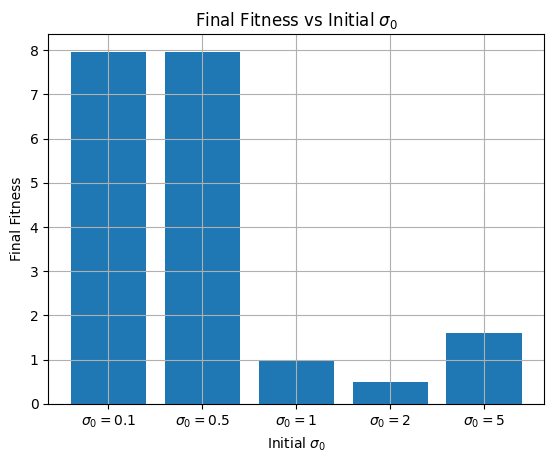

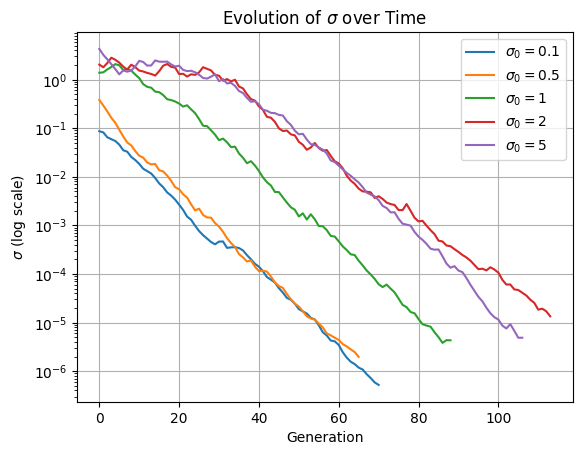

In [41]:
starting_point = np.array([2, 2])
sigma_values = [0.1, 0.5, 1, 2, 5]
max_evaluations = 1000

final_fitness = {}
sigma_evolution = {}

for sigma in sigma_values:
    es = cma.CMAEvolutionStrategy(starting_point, sigma, {'maxfevals': max_evaluations})
    fitness_history = []
    sigma_history = []

    while not es.stop():
        solutions = es.ask()
        fitness = [rastrigin(np.array(s)) for s in solutions]
        es.tell(solutions, fitness)
        fitness_history.append(es.result.fbest)
        sigma_history.append(es.sigma)

    final_fitness[rf"$\sigma_0={sigma}$"] = fitness_history[-1]
    sigma_evolution[rf"$\sigma_0={sigma}$"] = sigma_history

plt.figure()
plt.bar(final_fitness.keys(), final_fitness.values())
plt.xlabel(r"Initial $\sigma_0$")
plt.ylabel("Final Fitness")
plt.title(r"Final Fitness vs Initial $\sigma_0$")
plt.grid(True)
plt.show()

plt.figure()
for label, sigma_hist in sigma_evolution.items():
    plt.plot(sigma_hist, label=label)
plt.xlabel("Generation")
plt.ylabel(r"$\sigma$ (log scale)")
plt.yscale("log")
plt.title(r"Evolution of $\sigma$ over Time")
plt.legend()
plt.grid(True)
plt.show()

A too-small $\sigma_0$ limits exploration to a narrow region, causing slow convergence or premature stagnation if the global minimum is far from the starting point. Conversely, a too-large $\sigma_0$ wastes evaluations on unpromising regions, delaying convergence and destabilizing adaptation. The adaptation rule adjusts $\sigma$ based on successful samples, but extreme $\sigma_0$ values hinder efficient adaptation.

In our case small $\sigma_0$ (0.1) was not able to find the global same for $\sigma_0$ = 0.5. To large $\sigma_0$ (5) was not able to find the global minimum as well but was not the furthest from it. The best $\sigma_0$ was 1 and 2, which weren't able to find the global minimum but were the closest to it.

### Ex. 3: Visualising the Covariance Matrix Adaptation
1. On Sphere in 2D, log es.C every 5 generations.
2. Use the provided `animate_distribution` to produce a GIF showing the shrinking and rotation of the sampling ellipse.
3. Submit the animation and two short observations about what the animation reveals regarding step-size vs. shape adaptation.

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=508637, Sun May  4 15:38:53 2025)


,x,y
0,1.712341e+00,8.441768e-01
1,1.326627e-02,-9.217208e-02
2,-6.467644e-02,-1.790706e-01
3,3.488793e-02,7.851326e-04
4,6.989946e-03,6.638405e-03
5,3.553954e-04,3.064816e-03
6,6.360936e-04,3.711960e-05
7,-6.715053e-04,8.258763e-05
8,-4.507308e-05,1.527289e-04
9,-3.830123e-06,-6.050082e-05


,C11,C12,C21,C22
0,0.971975,1.463274e-01,1.463274e-01,1.329878
1,1.045020,3.005305e-02,3.005305e-02,0.581911
2,0.336328,5.234316e-02,5.234316e-02,0.211146
3,0.149519,4.182945e-02,4.182945e-02,0.116955
4,0.043579,1.069369e-02,1.069369e-02,0.044084
5,0.010801,2.480928e-04,2.480928e-04,0.015929
6,0.005690,-4.559588e-04,-4.559588e-04,0.006864
7,0.001876,-2.426600e-04,-2.426600e-04,0.004444
8,0.001856,3.415289e-04,3.415289e-04,0.001366
9,0.000456,5.077214e-05,5.077214e-05,0.000654


MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved to sphere_covariance_adaptation.gif


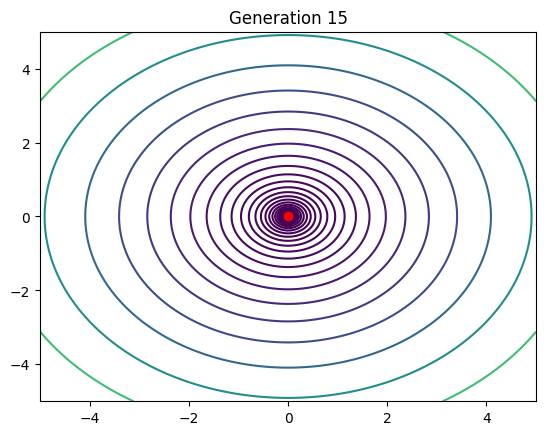

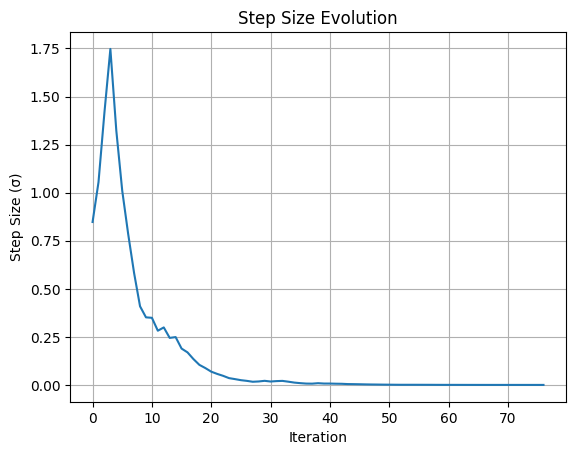

In [ ]:
starting_point = np.array([2, 2])
sigma0 = 0.5
max_iterations = 100

es = cma.CMAEvolutionStrategy(starting_point, sigma0, {'maxiter': max_iterations})
mu_history = []
cov_history = []
sigma_history = []
iteration = 0

while not es.stop():
    solutions = es.ask()
    fitness = [sphere(np.array(s)) for s in solutions]
    es.tell(solutions, fitness)
    
    if iteration % 5 == 0:
        mu_history.append(es.mean)
        cov_history.append(es.C)
    sigma_history.append(es.sigma)
    
    iteration += 1

mu_df = pd.DataFrame(mu_history, columns=["x", "y"])
flattened_cov_history = [cov.flatten() for cov in cov_history]
cov_df = pd.DataFrame(flattened_cov_history, columns=["C11", "C12", "C21", "C22"])
display(mu_df)
display(cov_df)

animate_distribution(
    func=sphere,
    mu_history=mu_history,
    cov_history=cov_history,
    bounds=(-5, 5),
    filename="sphere_covariance_adaptation.gif",
)
plt.show()

plt.plot(sigma_history)
plt.xlabel("Iteration")
plt.ylabel("Step Size (σ)")
plt.title("Step Size Evolution")
plt.grid(True)
plt.show()

Step-Size Adaptation: The plots show how the step size $\sigma$ decreases over iterations, indicating that the algorithm narrows its search as it approaches the optimum. This ensures precise exploitation near the solution.

Shape Adaptation: The animation and plots reveal how the covariance matrix adjusts the sampling ellipse's shape and orientation to align with the problem's landscape, improving efficiency in exploring non-symmetric regions.

So step-size decreases and the shape of the sampling ellipse is changing, it is getting more narrow and aligned with the direction of the global minimum.